In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [2]:
fao_data = pd.read_csv("latest_2504.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,255388.810691,141418.674834,331000.587974,Apples,25.331101,274.402429,605.783965,649.217529,1829.067462,916.135858,...,81.037938,109.688023,109.687327,109.686628,259.436250,259.436710,259.437173,0.668353,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Apricots,1.582001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,109.688717,109.687327,109.686628,259.435792,259.436710,259.437173,5.000001,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Cherries,4.086701,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,110.000001,109.688717,109.686628,259.230001,259.435792,259.437173,5.000001,5.000001,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Currants,6.042201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037818,110.000001,110.000001,109.688717,259.230001,259.230001,259.435792,5.000001,5.000001,5.000001
1990-01-01,256551.000001,142347.000001,332132.000001,Gooseberries,5.812001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,5.000001,5.000001,5.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,256551.000001,142347.000001,332132.000001,Sunflower seed,2.421201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,86.020001,110.000001,110.000001,29.000001,259.230001,259.230001,290.230001,0.410001,0.410001,0.410001
2020-01-01,149944.000001,86763.000001,358986.000001,Hop cones,3.519101,259.810001,367.000001,793.830001,1968.210001,142.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,0.410001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Rape or colza seed,4.693201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,26.000001,110.000001,110.000001,263.230001,259.230001,259.230001,0.100001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Soya beans,2.281201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,26.000001,110.000001,259.230001,263.230001,259.230001,0.100001,0.100001,0.410001


In [3]:
x_vals = ['Nutrient nitrogen N (total) - tonnes',
 'Nutrient phosphate P2O5 (total) - tonnes',
 'Nutrient potash K2O (total) - tonnes',
 'Fung & Bact – Benzimidazoles',
 'Fung & Bact – Diazines, morpholines',
 'Fung & Bact – Dithiocarbamates',
 'Fung & Bact – Inorganics',
 'Fung & Bact – Other',
 'Fung & Bact – Triazoles, diazoles',
 'Herbicides – Amides',
 'Herbicides – Carbamates',
 'Herbicides – Dinitroanilines',
 'Herbicides – Other',
 'Herbicides – Phenoxy hormone products',
 'Herbicides – Triazines',
 'Herbicides – Urea derivates',
 'Insecticides – Botanical products and biologicals',
 'Insecticides – Carbamates',
 'Insecticides – Organo-phosphates',
 'Insecticides – Other',
 'Insecticides – Pyrethroids',
 'Mineral Oils',
 'Plant Growth Regulators',
 'Rodenticides – Other',
 'Herbicides – Bipiridils',
 'Herbicides – Sulfonyl ureas',
 'Rodenticides – Anti-coagulants',
 'Nutrient nitrogen N (total) - tonnes-1',
 'Nutrient nitrogen N (total) - tonnes-2',
 'Nutrient nitrogen N (total) - tonnes-3',
 'Nutrient phosphate P2O5 (total) - tonnes-1',
 'Nutrient phosphate P2O5 (total) - tonnes-2',
 'Nutrient phosphate P2O5 (total) - tonnes-3',
 'Nutrient potash K2O (total) - tonnes-1',
 'Nutrient potash K2O (total) - tonnes-2',
 'Nutrient potash K2O (total) - tonnes-3',
 'Yield(tonnes/ha)-1',
 'Yield(tonnes/ha)-2',
 'Yield(tonnes/ha)-3',
 'Fung & Bact – Benzimidazoles-1',
 'Fung & Bact – Benzimidazoles-2',
 'Fung & Bact – Benzimidazoles-3',
 'Fung & Bact – Diazines, morpholines-1',
 'Fung & Bact – Diazines, morpholines-2',
 'Fung & Bact – Diazines, morpholines-3',
 'Fung & Bact – Dithiocarbamates-1',
 'Fung & Bact – Dithiocarbamates-2',
 'Fung & Bact – Dithiocarbamates-3',
 'Fung & Bact – Inorganics-1',
 'Fung & Bact – Inorganics-2',
 'Fung & Bact – Inorganics-3',
 'Fung & Bact – Other-1',
 'Fung & Bact – Other-2',
 'Fung & Bact – Other-3',
 'Fung & Bact – Triazoles, diazoles-1',
 'Fung & Bact – Triazoles, diazoles-2',
 'Fung & Bact – Triazoles, diazoles-3',
 'Herbicides – Amides-1',
 'Herbicides – Amides-2',
 'Herbicides – Amides-3',
 'Herbicides – Carbamates-1',
 'Herbicides – Carbamates-2',
 'Herbicides – Carbamates-3',
 'Herbicides – Dinitroanilines-1',
 'Herbicides – Dinitroanilines-2',
 'Herbicides – Dinitroanilines-3',
 'Herbicides – Other-1',
 'Herbicides – Other-2',
 'Herbicides – Other-3',
 'Herbicides – Phenoxy hormone products-1',
 'Herbicides – Phenoxy hormone products-2',
 'Herbicides – Phenoxy hormone products-3',
 'Herbicides – Triazines-1',
 'Herbicides – Triazines-2',
 'Herbicides – Triazines-3',
 'Herbicides – Urea derivates-1',
 'Herbicides – Urea derivates-2',
 'Herbicides – Urea derivates-3',
 'Insecticides – Botanical products and biologicals-1',
 'Insecticides – Botanical products and biologicals-2',
 'Insecticides – Botanical products and biologicals-3',
 'Insecticides – Carbamates-1',
 'Insecticides – Carbamates-2',
 'Insecticides – Carbamates-3',
 'Insecticides – Organo-phosphates-1',
 'Insecticides – Organo-phosphates-2',
 'Insecticides – Organo-phosphates-3',
 'Insecticides – Other-1',
 'Insecticides – Other-2',
 'Insecticides – Other-3',
 'Insecticides – Pyrethroids-1',
 'Insecticides – Pyrethroids-2',
 'Insecticides – Pyrethroids-3',
 'Mineral Oils-1',
 'Mineral Oils-2',
 'Mineral Oils-3',
 'Plant Growth Regulators-1',
 'Plant Growth Regulators-2',
 'Plant Growth Regulators-3',
 'Rodenticides – Other-1',
 'Rodenticides – Other-2',
 'Rodenticides – Other-3',
 'Herbicides – Bipiridils-1',
 'Herbicides – Bipiridils-2',
 'Herbicides – Bipiridils-3',
 'Herbicides – Sulfonyl ureas-1',
 'Herbicides – Sulfonyl ureas-2',
 'Herbicides – Sulfonyl ureas-3',
 'Rodenticides – Anti-coagulants-1',
 'Rodenticides – Anti-coagulants-2',
 'Rodenticides – Anti-coagulants-3']

In [4]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

Intercept 12.25201556440324
Prediction_local [20.87907301]
Right: 10.530301


,Features_Fruits and Nuts,Coeffcients (GBR)_Fruits and Nuts
0,Herbicides – Carbamates <= 0.70,8.172790
1,Yield(tonnes/ha)-1 <= 0.11,3.018857
2,"Fung & Bact – Triazoles, diazoles-3 <= 0.59",1.900215
3,Mineral Oils-3 <= 0.63,-1.687171
4,Herbicides – Phenoxy hormone products-1 <= 0.54,-1.667916
5,Rodenticides – Other-1 <= 0.58,1.640528
6,Fung & Bact – Inorganics <= 0.62,-1.572510
7,Nutrient phosphate P2O5 (total) - tonnes-3 <= ...,1.489450
8,"Fung & Bact – Triazoles, diazoles-1 <= 0.59",-1.368834
9,Nutrient potash K2O (total) - tonnes-1 <= 0.64,-1.298351


Intercept 28.039130521308007
Prediction_local [91.33020763]
Right: 10.039801


,Features_Vegetables and Legumes,Coeffcients (GBR)_Vegetables and Legumes
0,Yield(tonnes/ha)-1 > 0.16,59.490649
1,Yield(tonnes/ha)-3 <= 0.02,-13.286566
2,0.02 < Yield(tonnes/ha)-2 <= 0.09,11.103498
3,Fung & Bact – Benzimidazoles-1 <= 0.70,9.263648
4,Insecticides – Organo-phosphates-3 <= 0.70,-9.134886
5,Herbicides – Phenoxy hormone products <= 0.54,-8.135403
6,Nutrient nitrogen N (total) - tonnes-2 <= 0.54,7.113521
7,"Fung & Bact – Triazoles, diazoles-2 <= 0.59",6.615850
8,Fung & Bact – Other-1 <= 0.43,6.574069
9,"Fung & Bact – Diazines, morpholines-1 <= 0.59",-6.313303


Intercept 8.426115476447722
Prediction_local [8.34824129]
Right: 8.202900999999999


,Features_Cereals,Coeffcients (GBR)_Cereals
0,0.60 < Yield(tonnes/ha)-1 <= 0.67,1.429453
1,Herbicides – Other-1 <= 0.65,-0.905779
2,Insecticides – Organo-phosphates-1 <= 0.18,-0.406662
3,Herbicides – Phenoxy hormone products-3 <= 0.54,0.341617
4,"Fung & Bact – Triazoles, diazoles-3 <= 0.59",-0.292011
5,0.60 < Yield(tonnes/ha)-2 <= 0.67,0.290429
6,Fung & Bact – Dithiocarbamates <= 0.45,-0.282502
7,Nutrient nitrogen N (total) - tonnes-2 <= 0.54,0.273701
8,Fung & Bact – Dithiocarbamates-1 <= 0.45,-0.266898
9,Herbicides – Phenoxy hormone products <= 0.54,-0.259222


Intercept 3.039539525200311
Prediction_local [3.70928066]
Right: 5.511901000000001


,Features_Industrial_crops,Coeffcients (GBR)_Industrial_crops
0,Yield(tonnes/ha)-1 <= 0.35,0.947523
1,Fung & Bact – Inorganics-2 <= 0.62,-0.179341
2,Fung & Bact – Other-1 <= 0.43,0.123747
3,0.43 < Yield(tonnes/ha)-2 <= 0.51,0.093037
4,Insecticides – Other-3 <= 0.06,-0.089573
5,Herbicides – Urea derivates-1 <= 0.49,-0.089534
6,Insecticides – Organo-phosphates-1 <= 0.70,0.085800
7,Herbicides – Phenoxy hormone products-2 <= 0.54,-0.074638
8,Herbicides – Phenoxy hormone products <= 0.54,-0.073949
9,Nutrient potash K2O (total) - tonnes <= 0.64,-0.073331


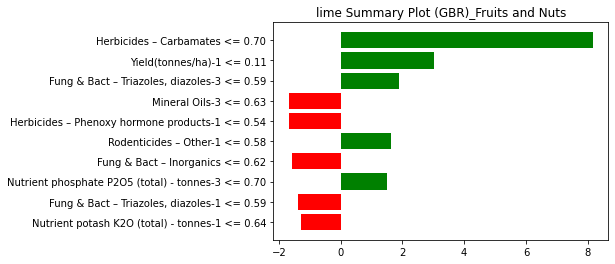

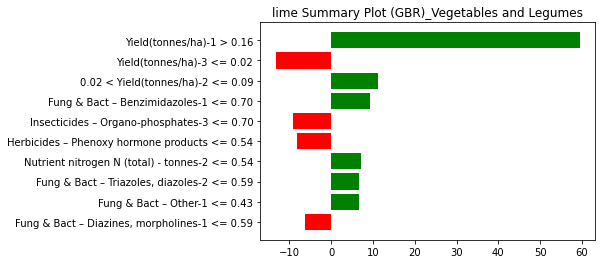

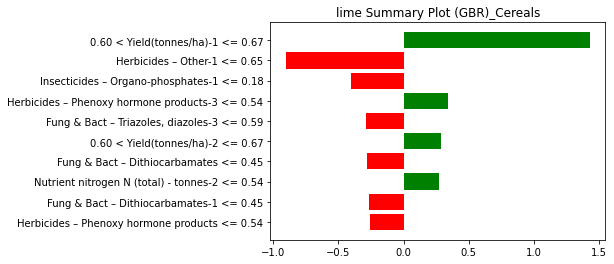

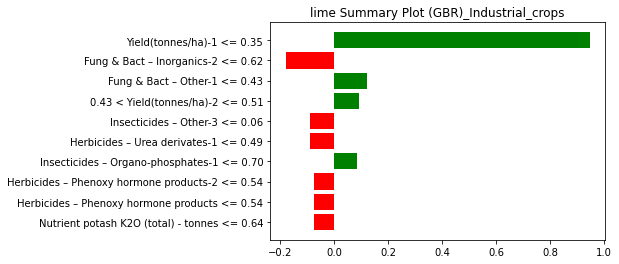

In [6]:
doc = Document()
mmsc_X = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    x = pd.DataFrame(mmsc_X.fit_transform(crop_df[x_vals]), columns=x_vals)
    y = crop_df[['Yield(tonnes/ha)']]
  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = GradientBoostingRegressor(max_depth=100, n_estimators=1000, learning_rate= 1)
    regressor.fit(x_train, y_train)


    #prediction of new value
    y_pred = regressor.predict(x_test)

    #prediction of new value
    y_pred = regressor.predict(x_test)
    #lime implementation
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[0], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (GBR)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (GBR)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (GBR)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_GBR.docx')
